In [7]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt

from SnakeGA import SnakeSettings
from SnakeGA import SnakeGA


In [8]:
settings = SnakeSettings(field_size=10,
                         view_depth=2,
                         steps_without_food=100,
                         hidden_topology=[20, 12],
                         hidden_activations=["relu", "relu"],
                         population_size=100,
                         epochs=10,
                         mutation_rate=0.01,
                         elitism_num=3,
                         auto_save_span=10)


In [9]:
snakes = SnakeGA(settings=settings)


[Taichi] Starting on arch=x64
Input neurons count -  32
NN params count -  964


In [10]:
ti.profiler.clear_kernel_profiler_info()  # clear all records
snakes.advance()
ti.profiler.print_kernel_profiler_info(mode='count')


Epoch 10/10=========================================================================
Kernel Profiler(count, default) @ X64 
[      %     total   count |      min       avg       max   ] Kernel name
-------------------------------------------------------------------------
[ 94.11%   1.839 s  88317x |    0.012     0.021     0.941 ms] prep_vision_c80_0_kernel_1_range_for
[  4.84%   0.095 s   1001x |    0.064     0.094     0.517 ms] tensor_to_ext_arr_c6_0_kernel_0_range_for
[  0.83%   0.016 s  88317x |    0.000     0.000     0.029 ms] prep_vision_c80_0_kernel_0_serial
[  0.08%   0.002 s     10x |    0.130     0.153     0.182 ms] crossover_c86_0_kernel_0_range_for
[  0.06%   0.001 s     10x |    0.085     0.108     0.131 ms] switch_population_c92_0_kernel_0_range_for
[  0.01%   0.000 s     10x |    0.011     0.024     0.090 ms] log_c94_0_kernel_1_range_for
[  0.01%   0.000 s   1000x |    0.000     0.000     0.001 ms] snode_writer_12_kernel_0_serial
[  0.01%   0.000 s     10x |    0.017     

Text(0, 0.5, 'Fitness')

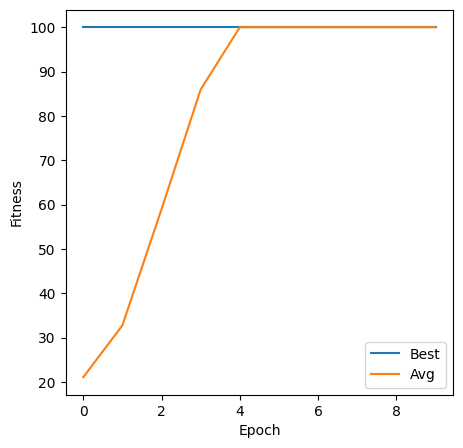

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

plt.plot(snakes.best.to_numpy(), label="Best")
plt.plot(snakes.avg.to_numpy(), label="Avg")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Fitness")
